In [2]:
# Los datos: EXPLORACIÓN Y LIMPIEZA
# 1. Customer flight Analisys.csv (actividad de vuelo de los clientes)
# 2. Customer Loyalty History.csv (perfil de los clientes)
# Ejercicio:
# FASE 1 - EXPLORACIÓN Y LIMPIEZA
# 1.1 Exploracion inicial: nulos, valores atipicos, datos faltantes...(Pandas)
# 1.2 Unión de los conjuntos
# 2.1 Eliminación o imputación de nulos
# 2.2 Verificar consistencia y correlacion
# 2.3 Ajustes y conversiones necesarias para el análisis estadístico

In [3]:
# Impotación de librterias necesarias para el ejercicio
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [4]:
# Lectura de ficheros - Voy a utilizar distintos métodos para el EDA
df_cf = pd.read_csv("files/customer_flight_activity.csv") #Actividad de vuelo
df_cf.head() # ver las primeras filas
df_cf.sample(8) # ver filas aleatorias

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
68698,159525,2017,5,5,5,10,3930,393.00,0,0
144265,581999,2017,9,8,1,9,909,90.00,0,0
207619,229166,2018,3,4,0,4,2816,303.48,693,56
179239,644017,2017,11,7,3,10,2760,276.00,0,0
249755,797120,2018,3,0,0,0,0,0.00,0,0
71785,324713,2017,5,0,0,0,0,0.00,0,0
161935,621823,2017,10,0,0,0,0,0.00,0,0
179943,681984,2017,11,11,1,12,3036,303.00,0,0


In [5]:
df_cl = pd.read_csv("files/customer_loyalty_history.csv")# Clientes
df_cl.head()
df_cl.sample(8) # Me llama la atención que el país es siempre Canadá
df_cl["Country"].unique() # Compruebo que en esa columna solo está Canadá ¿Eliminar?

array(['Canada'], dtype=object)

In [6]:
# Para seguir voy a unificar ambos csv en uno solo. Para ello comprueblo que la columna para realizar esta unión es:
# "Loyalty Number" ya que es compartida por ambos csv y se refiere al identificador del cliente. 
# Aplico el método .merge() que permite combinar 2 DataFrame basándose en una o varias columnas comunes.
df = df_cf.merge(df_cl, how = "inner", on = "Loyalty Number")

In [7]:
df.shape # el tamaño

(405624, 25)

In [8]:
df.columns # Las columnas. Creo que será más ágil cambiarles el nombre para evitar malos entendidos

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [9]:
# Creo una nueva variable con un diccionario con las columnas y su traduccion.
columnas = {
    'Loyalty Number': "ID_fidelidad", 
    'Year': "ano",
    'Month': "mes", 
    'Flights Booked': "total_vuelos_mes",
    'Flights with Companions': "vuelos_con_acompañantes", 
    'Total Flights': "total_vuelos", 
    'Distance': "distancia_total_mes",
    'Points Accumulated': "puntos_acumulados_mes", 
    'Points Redeemed': "puntos_canjeados", 
    'Dollar Cost Points Redeemed': "valor_puntos_canjeados_dollar",
    'Country': "pais", 
    'Province': "provincia", 
    'City': "ciudad", 
    'Postal Code': "codigo_postal", 
    'Gender': "genero", 
    'Education': "estudios",
    'Salary' : "salario", 
    'Marital Status': "estado_civil", 
    'Loyalty Card': "tarjeta_fidelidad" , 
    'CLV': "valor_total_cliente", 
    'Enrollment Type': "inscripcion",
    'Enrollment Year': "alta_año", 
    'Enrollment Month': "alta_mes", 
    'Cancellation Year': "baja_año",
    'Cancellation Month' : "baja_mes"}
# Utilizo el metodo rename para cambiar el nombre de las columnas y compruebo
df.rename(columns= columnas, inplace=True)
df.sample(20)

,ID_fidelidad,ano,mes,total_vuelos_mes,vuelos_con_acompañantes,total_vuelos,distancia_total_mes,puntos_acumulados_mes,puntos_canjeados,valor_puntos_canjeados_dollar,pais,provincia,ciudad,codigo_postal,genero,estudios,salario,estado_civil,tarjeta_fidelidad,valor_total_cliente,inscripcion,alta_año,alta_mes,baja_año,baja_mes
244750,699343,2018,11,5,0,5,2405,240.00,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,49516.0,Divorced,Star,8630.05,Standard,2015,5,NaN,NaN
141590,441423,2018,3,10,0,10,1570,169.56,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,59491.0,Married,Star,4413.29,Standard,2015,11,NaN,NaN
179389,536066,2018,3,15,2,17,2074,223.56,0,0,Canada,Alberta,Banff,T4V 1D4,Female,Doctor,254243.0,Married,Star,4885.16,Standard,2014,4,NaN,NaN
387714,436705,2018,7,0,0,0,0,0.00,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Married,Star,2416.48,Standard,2014,12,2018.0,4.0
92483,323792,2017,12,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,College,NaN,Married,Nova,13752.47,Standard,2015,12,2016.0,7.0
118755,385864,2017,6,2,2,4,2108,210.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,College,NaN,Single,Star,3857.77,Standard,2012,7,NaN,NaN
322901,899287,2017,6,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,M2P 4F6,Male,College,NaN,Single,Aurora,6743.12,Standard,2017,4,NaN,NaN
218599,632826,2017,8,2,2,4,2240,224.00,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,College,NaN,Single,Star,2898.73,Standard,2017,3,NaN,NaN
42665,202859,2018,4,2,2,4,1000,150.00,420,34,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,86388.0,Single,Aurora,5595.39,Standard,2015,3,NaN,NaN
403394,941545,2017,3,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,66001.0,Married,Nova,16547.64,2018 Promotion,2018,2,2018.0,10.0


In [10]:
# LIMPIEZA: compruebo si hay filas duplicadas en el df
df.duplicated().sum()

1864

In [11]:
#  # Hay 1864. Las elimino y compruebo (antes 405624/ahora 403760)
df = df.drop_duplicates()
df.shape

(403760, 25)

In [12]:
df.info() # Información sobre el data frame

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID_fidelidad                   403760 non-null  int64  
 1   ano                            403760 non-null  int64  
 2   mes                            403760 non-null  int64  
 3   total_vuelos_mes               403760 non-null  int64  
 4   vuelos_con_acompañantes        403760 non-null  int64  
 5   total_vuelos                   403760 non-null  int64  
 6   distancia_total_mes            403760 non-null  int64  
 7   puntos_acumulados_mes          403760 non-null  float64
 8   puntos_canjeados               403760 non-null  int64  
 9   valor_puntos_canjeados_dollar  403760 non-null  int64  
 10  pais                           403760 non-null  object 
 11  provincia                      403760 non-null  object 
 12  ciudad                         4037

In [13]:
# Considero que el pais no es relevante para el ejercicio ya que siempre es Canadá
# Además aparecen las provicias y ciudades y cp.
# Procedo a eliminar esa columna
df.drop(columns=["pais"], inplace=True)
df.columns

Index(['ID_fidelidad', 'ano', 'mes', 'total_vuelos_mes',
       'vuelos_con_acompañantes', 'total_vuelos', 'distancia_total_mes',
       'puntos_acumulados_mes', 'puntos_canjeados',
       'valor_puntos_canjeados_dollar', 'provincia', 'ciudad', 'codigo_postal',
       'genero', 'estudios', 'salario', 'estado_civil', 'tarjeta_fidelidad',
       'valor_total_cliente', 'inscripcion', 'alta_año', 'alta_mes',
       'baja_año', 'baja_mes'],
      dtype='object')

In [14]:
# Examino las columnas con nulos
df.isna().sum()

ID_fidelidad                          0
ano                                   0
mes                                   0
total_vuelos_mes                      0
vuelos_con_acompañantes               0
total_vuelos                          0
distancia_total_mes                   0
puntos_acumulados_mes                 0
puntos_canjeados                      0
valor_puntos_canjeados_dollar         0
provincia                             0
ciudad                                0
codigo_postal                         0
genero                                0
estudios                              0
salario                          102260
estado_civil                          0
tarjeta_fidelidad                     0
valor_total_cliente                   0
inscripcion                           0
alta_año                              0
alta_mes                              0
baja_año                         354110
baja_mes                         354110
dtype: int64

In [15]:
# Para visualizar solo las columnas con nulos
df.isnull().sum()[df.isnull().sum() > 0]

salario     102260
baja_año    354110
baja_mes    354110
dtype: int64

In [16]:
# Examino el porcentaje de nulos que tengo para valorar que hacer con ellos.
# El alto porcentaje de nulos en las bajas indica que siguen activos.

df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0]*100

salario     25.326927
baja_año    87.703091
baja_mes    87.703091
dtype: float64

In [17]:
# Voy llenar los nulos en las bajas con el valor 0, es que siguen activos
df [["baja_año", "baja_mes"]] = df[["baja_año", "baja_mes"]].fillna(0)
df["baja_año"]

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
405619    2017.0
405620    2017.0
405621    2017.0
405622    2017.0
405623    2017.0
Name: baja_año, Length: 403760, dtype: float64

In [18]:
# Los nulos en el salario. Primero voy a inspeccionar esta columna para entender mejor que pasa.
df["salario"].describe()

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salario, dtype: float64

In [19]:
# ¿Por qué hay valores negativos en salario? ¿Es un error o es que deben dinero?
# ¿Cuantos salarios negativos hay?:
df[df["salario"]<0].shape # 480
df[df["salario"]<0].duplicated().sum() # 0

0

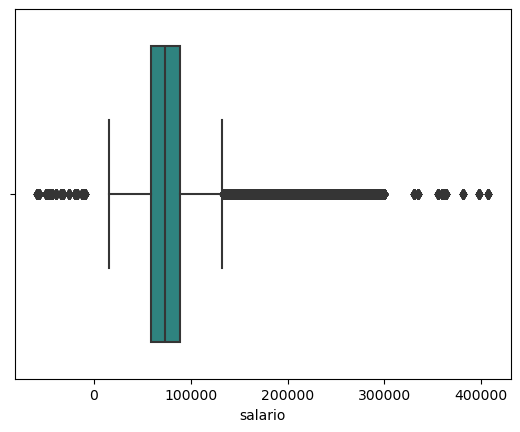

In [20]:
# Para visualizar los datos de salario vou a utilizar un boxplot (diagrama de caja) 
# y mostrar la mediana, los cuartiles de los datos,​ cómo se distribuyen los outliers (valores atípicos)
sns.boxplot(data = df,
            x= "salario",
            palette= "viridis");
# Se puede observar que los outliers negativos se concentran a bastante distancia de la mediana.

In [21]:
# Salario negativo.
# Tras una inspección de los datos y antes de imputar me aventuro con 3 hipótesis sobre el salario negativo.
# 1.salario negativo relacionado con el valor_total_cliente
# 2.salario negativo relacionado con exceso de puntos canjeados
# 3.salario negativo por error en la transcripción (solucionable con pasarlo a positivo) 
# (En mi razonamiento, creo que puede ser lógico que haya muchos nulos en el salario ya que es un dato complicado de conseguir)
# por eso es extraño que existan 480 en negativo.

In [22]:
# Filtrar los datos con salario negativo
salario_negativo = df[df["salario"] < 0]
salario_positivo = df[df["salario"] > 0]

# Hipótesis 1: Relación con el valor_total_cliente
# Comparar el valor total del cliente para los salarios negativos vs positivos
valor_cliente_neg = salario_negativo['valor_total_cliente'].mean()
valor_cliente_pos = df[df['salario'] >= 0]['valor_total_cliente'].mean()

print(f"Valor total cliente promedio con salario negativo: {valor_cliente_neg}")
print(f"Valor total cliente promedio con salario positivo: {valor_cliente_pos}")

# Valor total cliente promedio con salario negativo: 9919.029
# Valor total cliente promedio con salario positivo: 8130.305452670002
# No se observan grandes diferencias ni que aparezcan deudas en el valor de esos clientes.
# Por tanto, abandono esta hipótesis

Valor total cliente promedio con salario negativo: 9919.029
Valor total cliente promedio con salario positivo: 8125.793740216598


In [23]:
# Hipótesis 2: Relación con exceso de puntos canjeados
# Comparar los puntos canjeados para los salarios negativos vs positivos
puntos_canjeados_neg = salario_negativo['puntos_canjeados'].mean()
puntos_canjeados_pos = df[df['salario'] >= 0]['puntos_canjeados'].mean()

print(f"Puntos canjeados promedio con salario negativo: {puntos_canjeados_neg}")
print(f"Puntos canjeados promedio con salario positivo: {puntos_canjeados_pos}")
# No se observan grandes diferenias tampoco, no creo que el salario negativo esté relacionado con el exceso de puntos canjeados.
# Abandono la hipótesis 2.

Puntos canjeados promedio con salario negativo: 19.8
Puntos canjeados promedio con salario positivo: 30.657796824131285


In [24]:
# Hipótesis 3: Error en la transcripción
# Quiero ver el salario mínimo y máximo en los salarios positivos:
df[df["salario"]>0].head() # El salario mínimo positivo 92552.0
print ("El salario máximo:", df["salario"].max())
print ("El salario mínimo positivo:", df[df["salario"] >0]["salario"].min())




El salario máximo: 407228.0
El salario mínimo positivo: 15609.0


In [25]:
df[df["salario"]>0].head() 

,ID_fidelidad,ano,mes,total_vuelos_mes,vuelos_con_acompañantes,total_vuelos,distancia_total_mes,puntos_acumulados_mes,puntos_canjeados,valor_puntos_canjeados_dollar,provincia,ciudad,codigo_postal,genero,estudios,salario,estado_civil,tarjeta_fidelidad,valor_total_cliente,inscripcion,alta_año,alta_mes,baja_año,baja_mes
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0


In [26]:
# Convertir los salarios negativos a positivos y ver la distribución
salarios_convertidos = salario_negativo['salario'].abs() # Devuelve el valor absoluto de un número.

print(f"Salario mínimo tras convertir a positivo: {salarios_convertidos.min()}") # 9081.0
print(f"Salario máximo tras convertir a positivo: {salarios_convertidos.max()}") # 58486.0

# Teniendo en cuenta que le mínimo en ambos casos es similar creo que esta es la ipótesis más plauaible.
# El máximo estaría dentro de los ouliers, pero interpreto que siempre hay salarios fuera de la media.

Salario mínimo tras convertir a positivo: 9081.0
Salario máximo tras convertir a positivo: 58486.0


In [27]:
# Hipotesis 3 - Convertir el salario negativo en valores absolutos (positivo) con el método .abs()
df["salario"].describe() # Valores antes de la conversion

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salario, dtype: float64

In [28]:
df["salario"]=df["salario"].abs() # convertir los negativos en positivos
df["salario"].describe() # Comprobación

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salario, dtype: float64

In [29]:
# Los nulos en el salario. Considero que el salario es un dato relevante asi que voy a imputarlo.
# Entiendo que el salario tiene que ver con el trabajo que uno hace y este está relacionado también con el nivel de estudios, y
# y otros datos de los que disponemos (genero, estado civil,valor_total_cliente incluso la provincia). 
# Entre los métodos de los que dispongo me parece que el más adecuado es KNNImputer: una técnica que se basa en el algoritmo de vecinos más cercanos 
# para llenar los valores faltantes en nuestros datos. Pero como no dispongo del tiempo ni conexión suficiente voy a optar por imputarlos con la mediana.
# La imputación de mediana es adecuada cuando la distribución de los datos es asimétrica. Nos pasa sobre todo con la distribución de los outliers en los salarios más altos.
mediana_salario = df["salario"].median()
df["salario"] = df["salario"].fillna(mediana_salario)

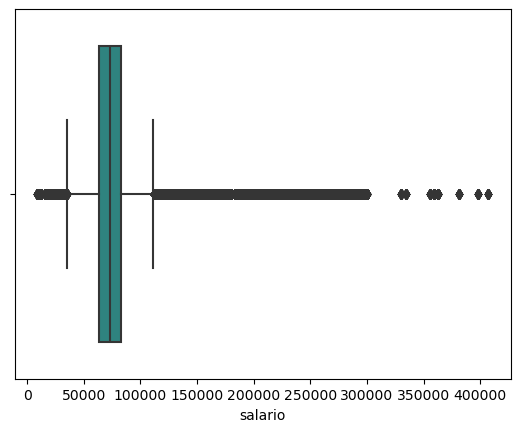

In [30]:
# Visualizamos que no hay salarios negativos y la distribución ahora es más lógica.
sns.boxplot(data = df,
            x= "salario",
            palette= "viridis");

In [31]:
# Compruebo que no hay nulos 
df.isnull().sum() # comprobamos que ya no hay nulos en el df

ID_fidelidad                     0
ano                              0
mes                              0
total_vuelos_mes                 0
vuelos_con_acompañantes          0
total_vuelos                     0
distancia_total_mes              0
puntos_acumulados_mes            0
puntos_canjeados                 0
valor_puntos_canjeados_dollar    0
provincia                        0
ciudad                           0
codigo_postal                    0
genero                           0
estudios                         0
salario                          0
estado_civil                     0
tarjeta_fidelidad                0
valor_total_cliente              0
inscripcion                      0
alta_año                         0
alta_mes                         0
baja_año                         0
baja_mes                         0
dtype: int64

In [32]:
# Unificar los datos - Voy a ir unificando y limpiando los datos susceptibles a ello.
# Pasar valores float a int
df[["puntos_acumulados_mes", 'baja_año', "baja_mes", "salario"]] = df[['puntos_acumulados_mes', 'baja_año', "baja_mes", "salario"]].astype(int)
# Comprobamos
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID_fidelidad                   403760 non-null  int64  
 1   ano                            403760 non-null  int64  
 2   mes                            403760 non-null  int64  
 3   total_vuelos_mes               403760 non-null  int64  
 4   vuelos_con_acompañantes        403760 non-null  int64  
 5   total_vuelos                   403760 non-null  int64  
 6   distancia_total_mes            403760 non-null  int64  
 7   puntos_acumulados_mes          403760 non-null  int64  
 8   puntos_canjeados               403760 non-null  int64  
 9   valor_puntos_canjeados_dollar  403760 non-null  int64  
 10  provincia                      403760 non-null  object 
 11  ciudad                         403760 non-null  object 
 12  codigo_postal                  4037

In [33]:
# Generar un nuevo csv. con mis datos ya limpios, filtrados y preparados:
df.to_csv("files/df_canada.csv")